In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# CC_CM

In [51]:

test_df = pd.read_csv('../dataset/cc_cm/test_dataset.csv', header=0)
train_df = pd.read_csv('../dataset/cc_cm/train_dataset.csv', header=0)

In [52]:

col_names = train_df.columns.values    

nominal_idx = [0, 124]
binary_idx = [123, 121, 122]
numeric_idx = list(set(range(125)).difference(nominal_idx).difference(binary_idx))

numeric_cols = col_names[numeric_idx].tolist()   # The columns that have numerical features

y_train = train_df['isCancerous']
y_test = test_df['isCancerous']

# In this case, we are only going to use the numeric columns for our predictions
X_train = train_df[numeric_cols]   
X_test = test_df[numeric_cols]



In [4]:
AUC_array = []

for i in range(120):
    print(i)
    pca = PCA(n_components=i+1, svd_solver='randomized')
    X_train_PCA = pca.fit_transform(X_train)
    X_test_PCA = pca.transform(X_test)
    
    # Create a Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    
    # Train the classifier
    clf.fit(X_train_PCA, y_train)
    
    # Predict the response for test dataset
    y_pred = clf.predict(X_test_PCA)
    
    AUC_array.append(metrics.roc_auc_score(y_test, y_pred))
    print("AUC:", AUC_array[i])
    
print(AUC_array)
    
    

0
AUC: 0.5545236839117242
1
AUC: 0.5586185654030105
2
AUC: 0.615277593907167
3
AUC: 0.6460652606913164
4
AUC: 0.6821813254855754
5
AUC: 0.6884735589113902
6
AUC: 0.6922965630760283
7
AUC: 0.6950074999897573
8
AUC: 0.7070104560763358
9
AUC: 0.71872442511899
10
AUC: 0.7313139148852966
11
AUC: 0.7317715132041465
12
AUC: 0.7320493600935445
13
AUC: 0.7305056497206589
14
AUC: 0.7351519991537421
15
AUC: 0.743192555253595
16
AUC: 0.7409214177816421
17
AUC: 0.7418107974330872
18
AUC: 0.7440451159748779
19
AUC: 0.745159625577816
20
AUC: 0.7469647433496591
21
AUC: 0.7478356444307138
22
AUC: 0.7451103071064938
23
AUC: 0.741363256303368
24
AUC: 0.7478245042761873
25
AUC: 0.7436212145408445
26
AUC: 0.7409893530339734
27
AUC: 0.7435501572431675
28
AUC: 0.7448904764909151
29
AUC: 0.74010989236104
30
AUC: 0.7393903451605348
31
AUC: 0.7377268005013479
32
AUC: 0.7365359342648182
33
AUC: 0.7376564228969874
34
AUC: 0.7336572039800991
35
AUC: 0.738553002753678
36
AUC: 0.7367117457449893
37
AUC: 0.7388512290

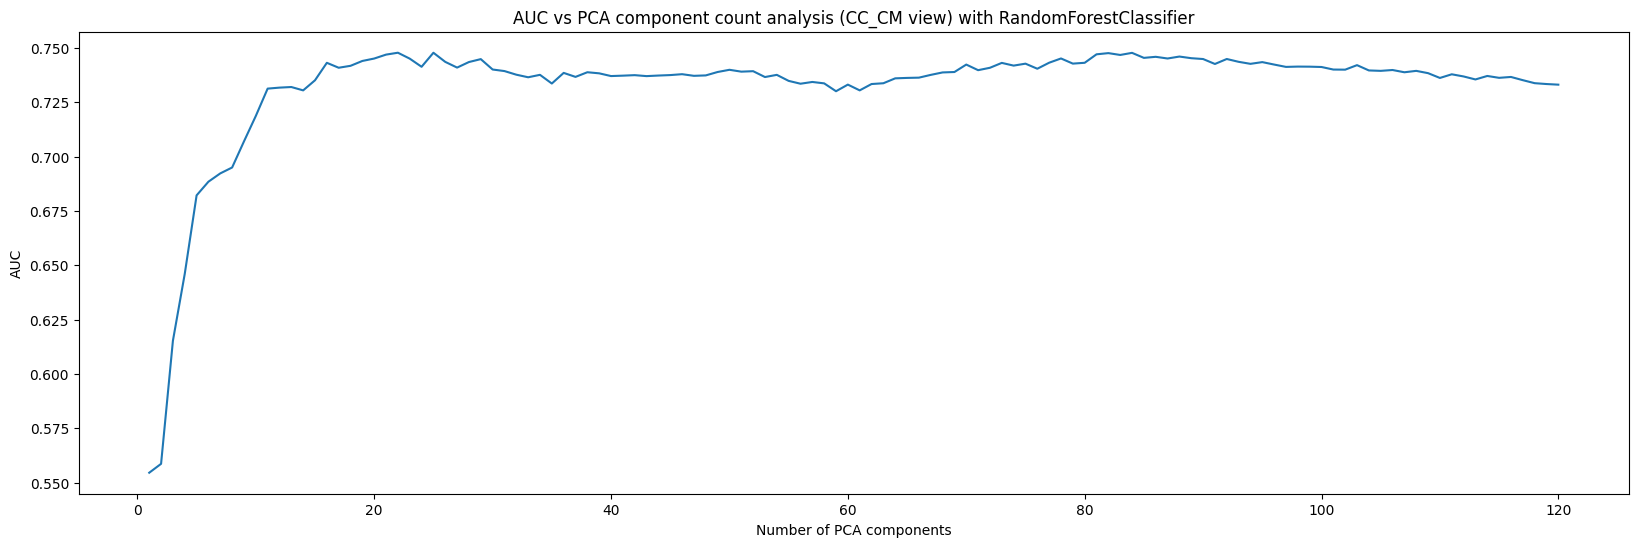

In [27]:
x_values = range(1, len(AUC_array) + 1)

plt.figure(figsize=(20,6))
plt.plot(x_values, AUC_array)
plt.xlabel('Number of PCA components')
plt.ylabel('AUC')
plt.title('AUC vs PCA component count analysis (CC_CM view) with RandomForestClassifier')
plt.show()

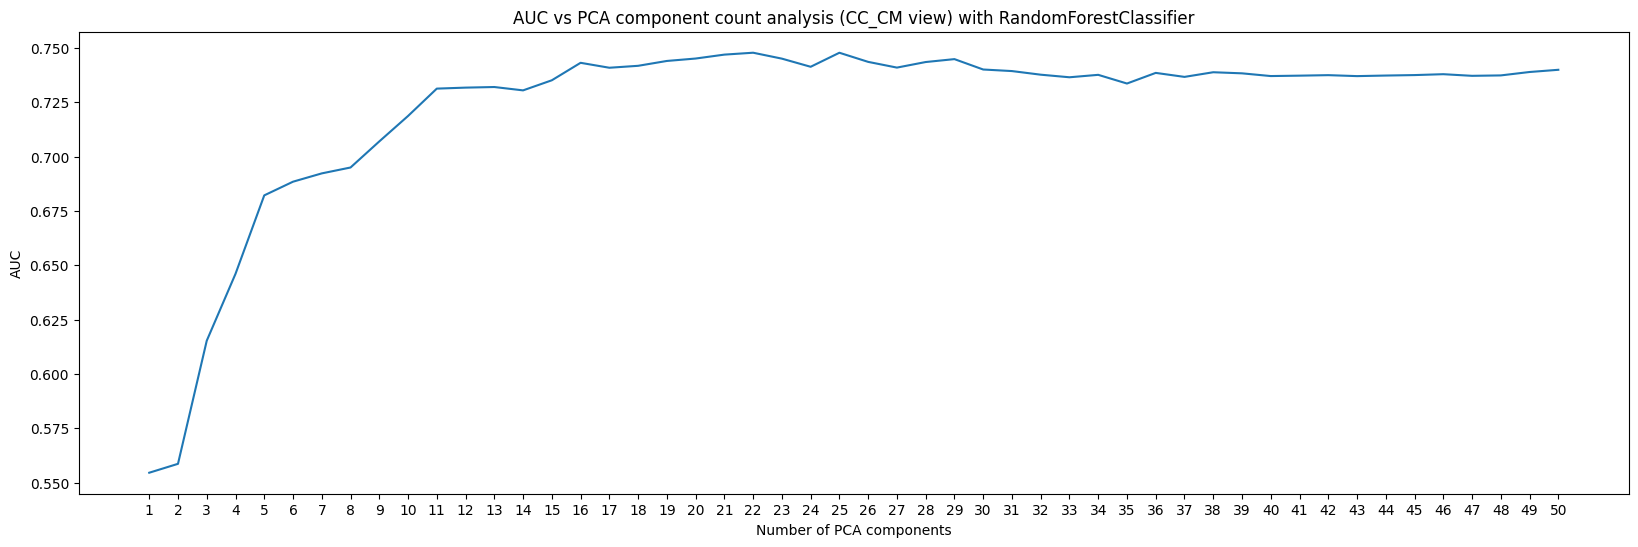

In [28]:
x_values = range(1, 51)

plt.figure(figsize=(20,6))
plt.plot(x_values, AUC_array[:50])
plt.xlabel('Number of PCA components')
plt.ylabel('AUC')
plt.title('AUC vs PCA component count analysis (CC_CM view) with RandomForestClassifier')
plt.xticks(x_values)
plt.show()

# CC_DM

In [29]:

test_df = pd.read_csv('../dataset/cc_dm/test_dataset.csv', header=0)
train_df = pd.read_csv('../dataset/cc_dm/train_dataset.csv', header=0)

In [30]:

col_names = train_df.columns.values    

nominal_idx = [0, 124]
binary_idx = [123, 121, 122]
numeric_idx = list(set(range(125)).difference(nominal_idx).difference(binary_idx))

numeric_cols = col_names[numeric_idx].tolist()   # The columns that have numerical features

y_train = train_df['isCancerous']
y_test = test_df['isCancerous']

# In this case, we are only going to use the numeric columns for our predictions
X_train = train_df[numeric_cols]   
X_test = test_df[numeric_cols]



### AUC_array_cc_dm = []

for i in range(120):
    print(i)
    pca = PCA(n_components=i+1, svd_solver='randomized')
    X_train_PCA = pca.fit_transform(X_train)
    X_test_PCA = pca.transform(X_test)
    
    # Create a Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    
    # Train the classifier
    clf.fit(X_train_PCA, y_train)
    
    # Predict the response for test dataset
    y_pred = clf.predict(X_test_PCA)
    
    AUC_array_cc_dm.append(metrics.roc_auc_score(y_test, y_pred))
    print("AUC:", AUC_array_cc_dm[i])
    
print(AUC_array_cc_dm)

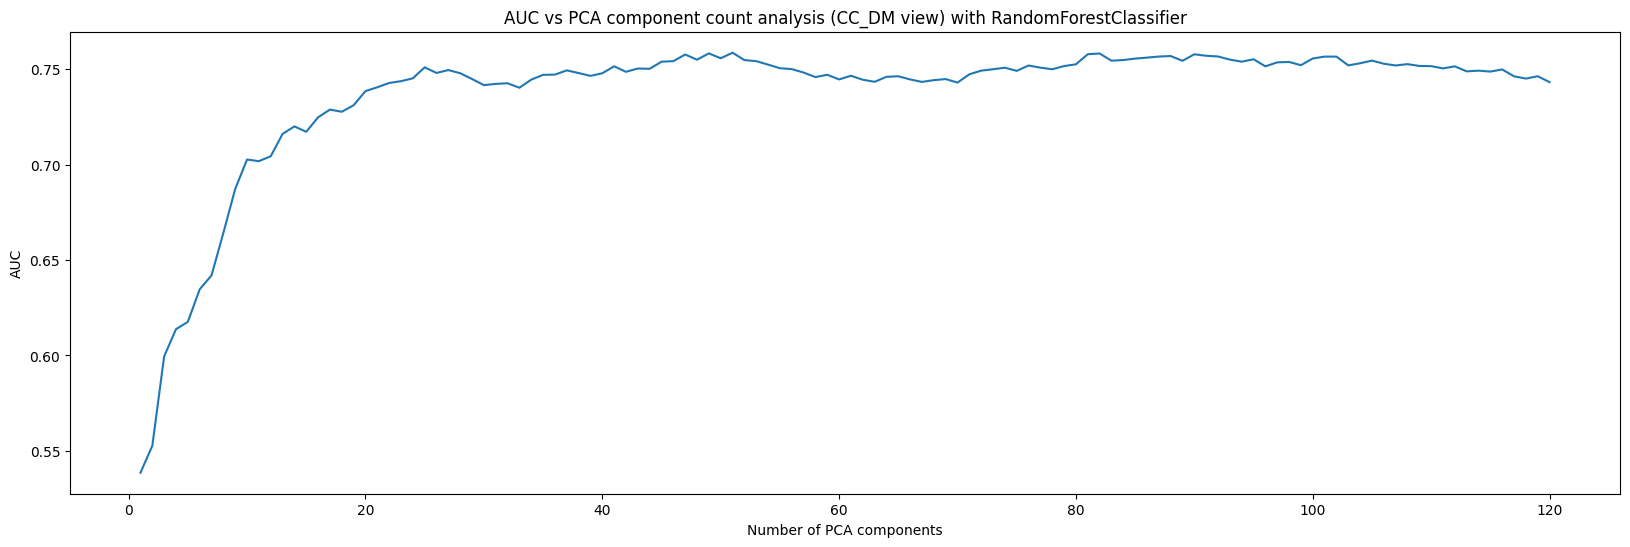

In [44]:
x_values = range(1, len(AUC_array_cc_dm) + 1)

plt.figure(figsize=(20,6))
plt.plot(x_values, AUC_array_cc_dm)
plt.xlabel('Number of PCA components')
plt.ylabel('AUC')
plt.title('AUC vs PCA component count analysis (CC_DM view) with RandomForestClassifier')
plt.show()

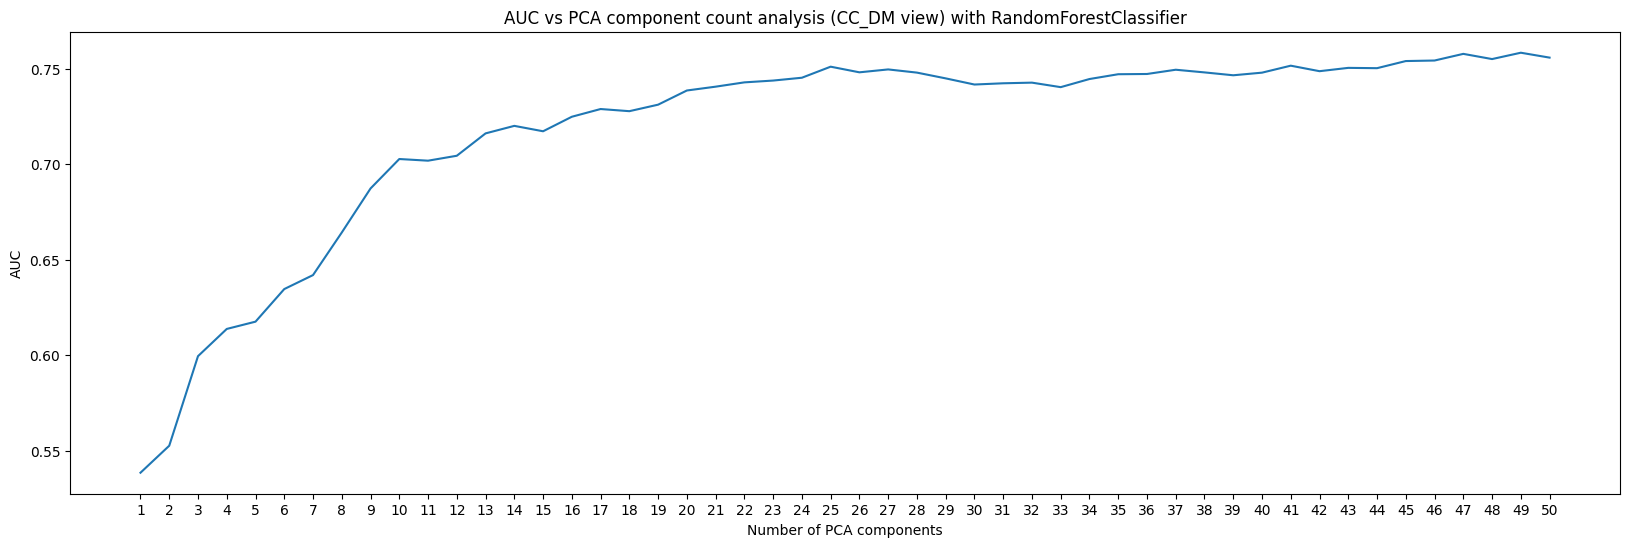

In [45]:
x_values = range(1, 51)

plt.figure(figsize=(20,6))
plt.plot(x_values, AUC_array_cc_dm[:50])
plt.xlabel('Number of PCA components')
plt.ylabel('AUC')
plt.title('AUC vs PCA component count analysis (CC_DM view) with RandomForestClassifier')
plt.xticks(x_values)
plt.show()

# MLO_CM

In [53]:

test_df = pd.read_csv('../dataset/mlo_cm/test_dataset.csv', header=0)
train_df = pd.read_csv('../dataset/mlo_cm/train_dataset.csv', header=0)

In [54]:

col_names = train_df.columns.values    

nominal_idx = [0, 124]
binary_idx = [123, 121, 122]
numeric_idx = list(set(range(125)).difference(nominal_idx).difference(binary_idx))

numeric_cols = col_names[numeric_idx].tolist()   # The columns that have numerical features

y_train = train_df['isCancerous']
y_test = test_df['isCancerous']

# In this case, we are only going to use the numeric columns for our predictions
X_train = train_df[numeric_cols]   
X_test = test_df[numeric_cols]



In [56]:
AUC_array_mlo_cm = []

for i in range(120):
    print(i)
    pca = PCA(n_components=i+1, svd_solver='randomized')
    X_train_PCA = pca.fit_transform(X_train)
    X_test_PCA = pca.transform(X_test)
    
    # Create a Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    
    # Train the classifier
    clf.fit(X_train_PCA, y_train)
    
    # Predict the response for test dataset
    y_pred = clf.predict(X_test_PCA)
    
    AUC_array_mlo_cm.append(metrics.accuracy_score(y_test, y_pred))
    print("AUC:", AUC_array_mlo_cm[i])
    
print(AUC_array_mlo_cm)

0
AUC: 0.7892723807534658
1
AUC: 0.8548024958880506
2
AUC: 0.8729211811085293
3
AUC: 0.8843432629297966
4
AUC: 0.8909615434822338
5
AUC: 0.8993681957026864
6
AUC: 0.9025663786126413
7
AUC: 0.902775239537373
8
AUC: 0.9065869514137274
9
AUC: 0.9109469232175026
10
AUC: 0.9153330026368691
11
AUC: 0.9160248544500431
12
AUC: 0.9174216118841866
13
AUC: 0.9175390961543483
14
AUC: 0.920933086181239
15
AUC: 0.9235438477403859
16
AUC: 0.9249536589823252
17
AUC: 0.9252800041772185
18
AUC: 0.9256585646032948
19
AUC: 0.9264679006866303
20
AUC: 0.9258804793358223
21
AUC: 0.9253844346395844
22
AUC: 0.9245489909406573
23
AUC: 0.9245489909406573
24
AUC: 0.9258282641046394
25
AUC: 0.9248753361355507
26
AUC: 0.9247970132887763
27
AUC: 0.9248753361355507
28
AUC: 0.9252277889460355
29
AUC: 0.9248231209043678
30
AUC: 0.9249536589823252
31
AUC: 0.9245359371328616
32
AUC: 0.9243531838237213
33
AUC: 0.923635224394956
34
AUC: 0.9241443228989896
35
AUC: 0.9248361747121635
36
AUC: 0.9238963005508707
37
AUC: 0.9243

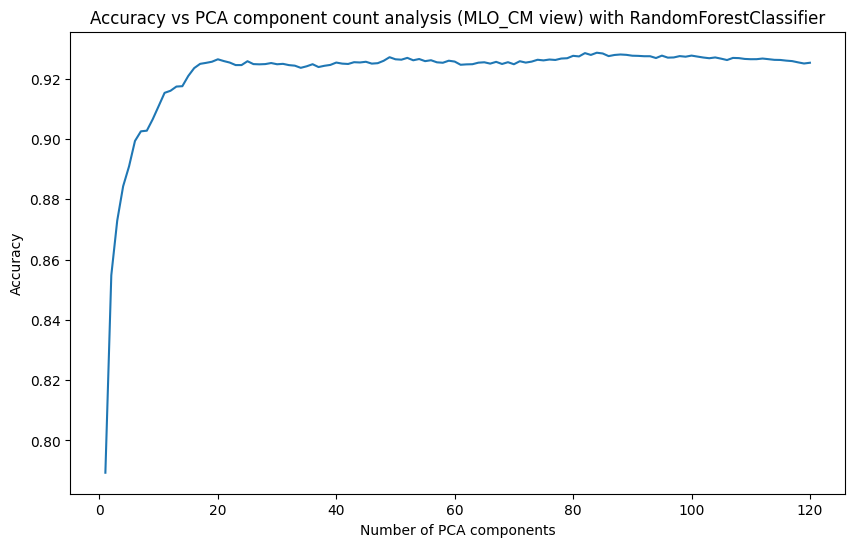

In [62]:
x_values = range(1, len(AUC_array_mlo_cm) + 1)

plt.figure(figsize=(10,6))
plt.plot(x_values, AUC_array_mlo_cm)
plt.xlabel('Number of PCA components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs PCA component count analysis (MLO_CM view) with RandomForestClassifier')
plt.show()

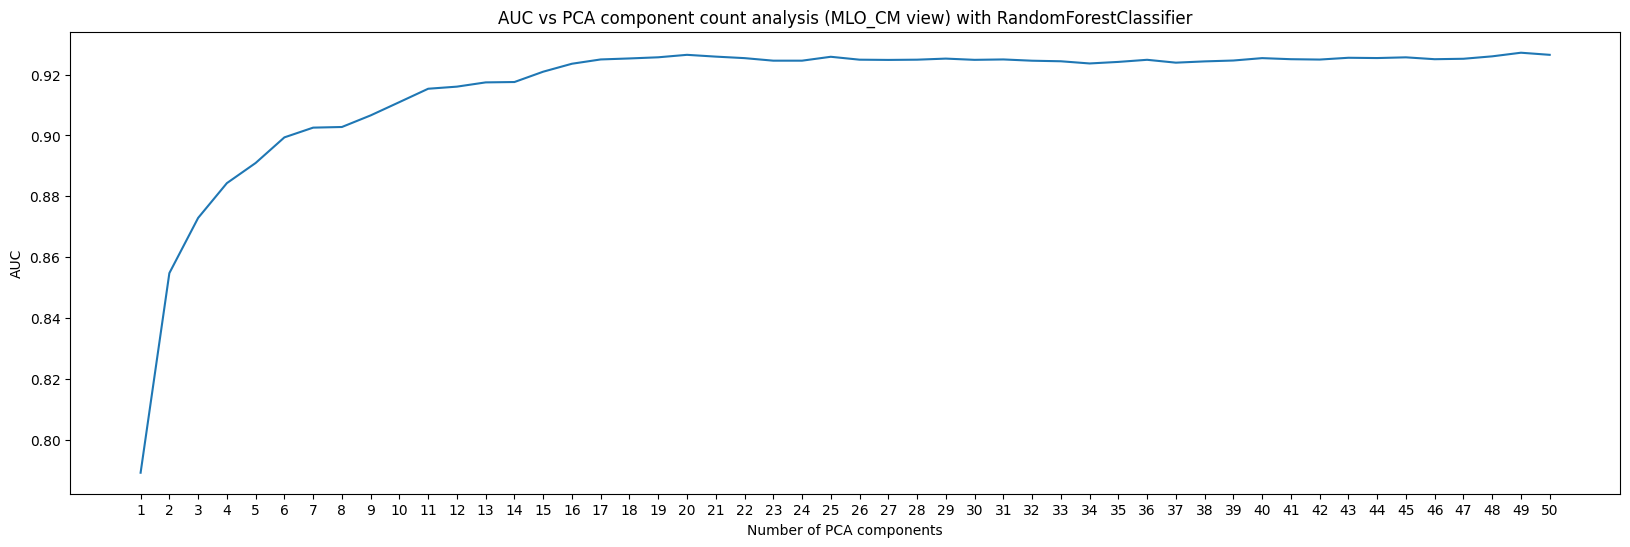

In [58]:
x_values = range(1, 51)

plt.figure(figsize=(20,6))
plt.plot(x_values, AUC_array_mlo_cm[:50])
plt.xlabel('Number of PCA components')
plt.ylabel('AUC')
plt.title('AUC vs PCA component count analysis (MLO_CM view) with RandomForestClassifier')
plt.xticks(x_values)
plt.show()

# MLO_DM

In [39]:

test_df = pd.read_csv('../dataset/mlo_dm/test_dataset.csv', header=0)
train_df = pd.read_csv('../dataset/mlo_dm/train_dataset.csv', header=0)

In [40]:

col_names = train_df.columns.values    

nominal_idx = [0, 124]
binary_idx = [123, 121, 122]
numeric_idx = list(set(range(125)).difference(nominal_idx).difference(binary_idx))

numeric_cols = col_names[numeric_idx].tolist()   # The columns that have numerical features

y_train = train_df['isCancerous']
y_test = test_df['isCancerous']

# In this case, we are only going to use the numeric columns for our predictions
X_train = train_df[numeric_cols]   
X_test = test_df[numeric_cols]



In [41]:
AUC_array_mlo_dm = []

for i in range(120):
    print(i)
    pca = PCA(n_components=i+1, svd_solver='randomized')
    X_train_PCA = pca.fit_transform(X_train)
    X_test_PCA = pca.transform(X_test)
    
    # Create a Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    
    # Train the classifier
    clf.fit(X_train_PCA, y_train)
    
    # Predict the response for test dataset
    y_pred = clf.predict(X_test_PCA)
    
    AUC_array_mlo_dm.append(metrics.roc_auc_score(y_test, y_pred))
    print("AUC:", AUC_array_mlo_dm[i])
    
print(AUC_array_mlo_dm)

0
AUC: 0.5454899394871244
1
AUC: 0.540719659110506
2
AUC: 0.5746580766104902
3
AUC: 0.5856357644900873
4
AUC: 0.5894524720814238
5
AUC: 0.5947139957495072
6
AUC: 0.6102864800970049
7
AUC: 0.6276121125559206
8
AUC: 0.6458440891437974
9
AUC: 0.6583807622817323
10
AUC: 0.6572494671349718
11
AUC: 0.6696604147418221
12
AUC: 0.665111393284413
13
AUC: 0.6640374294976379
14
AUC: 0.6663217381767998
15
AUC: 0.6745186258579721
16
AUC: 0.6760151340119056
17
AUC: 0.678066365820054
18
AUC: 0.6775984536789904
19
AUC: 0.6802104125098419
20
AUC: 0.6810820444394255
21
AUC: 0.6830879516245655
22
AUC: 0.6831935877163551
23
AUC: 0.6822000248376561
24
AUC: 0.6846755594119992
25
AUC: 0.6866652148907099
26
AUC: 0.6850219909914305
27
AUC: 0.6847803378797189
28
AUC: 0.6811820843993134
29
AUC: 0.6808527621503809
30
AUC: 0.6824763038469521
31
AUC: 0.6792792404337537
32
AUC: 0.6828590765721073
33
AUC: 0.6831631636373263
34
AUC: 0.6834291943086815
35
AUC: 0.6901094412457284
36
AUC: 0.6863794588657498
37
AUC: 0.6845

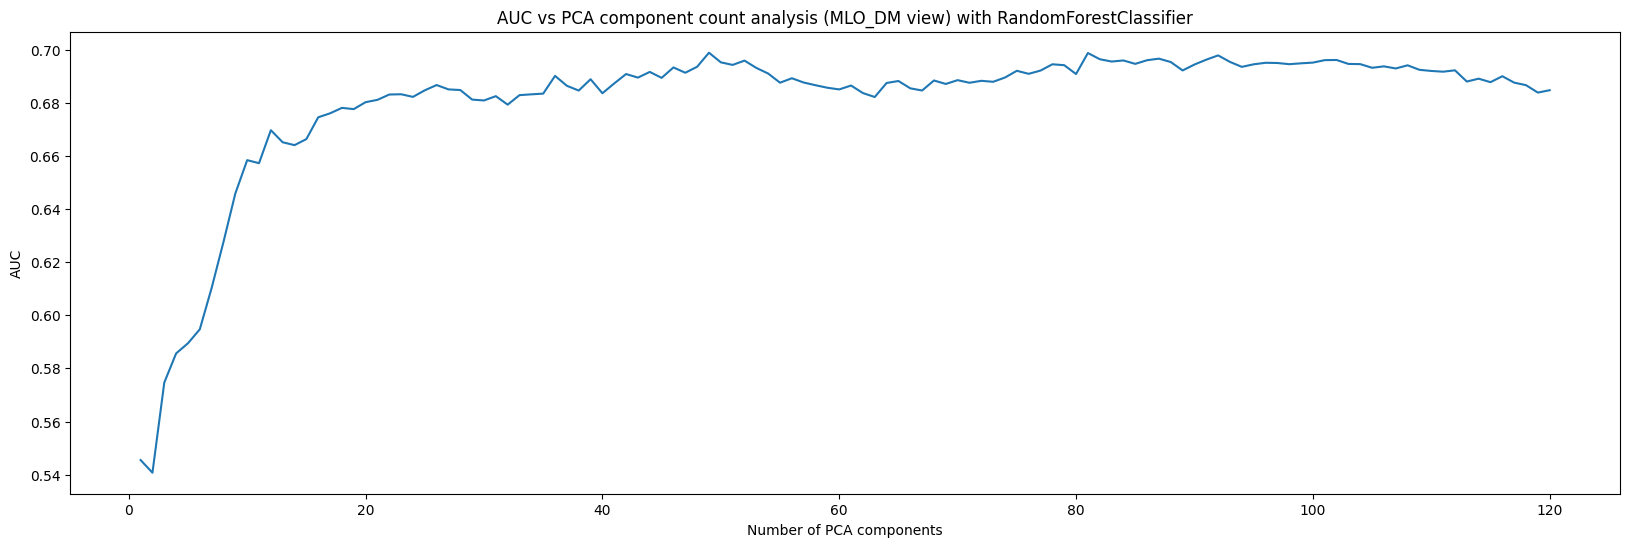

In [48]:
x_values = range(1, len(AUC_array_mlo_dm) + 1)

plt.figure(figsize=(20,6))
plt.plot(x_values, AUC_array_mlo_dm)
plt.xlabel('Number of PCA components')
plt.ylabel('AUC')
plt.title('AUC vs PCA component count analysis (MLO_DM view) with RandomForestClassifier')
plt.show()

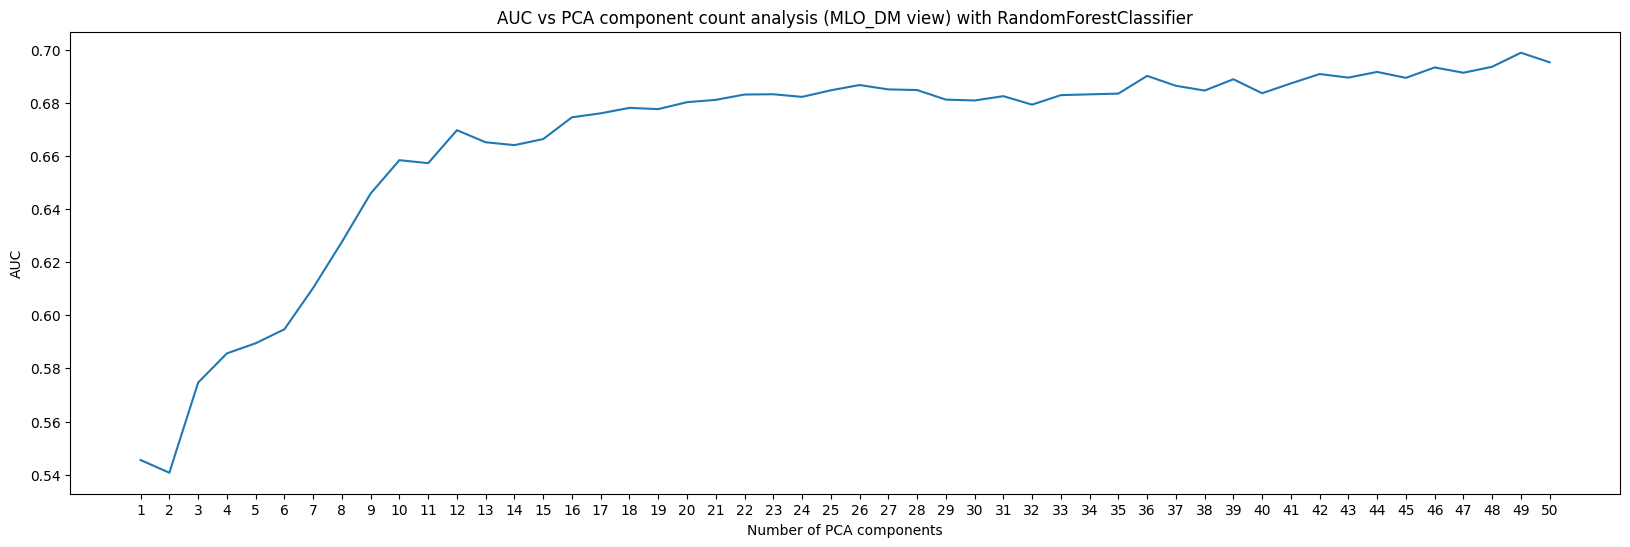

In [49]:
x_values = range(1, 51)

plt.figure(figsize=(20,6))
plt.plot(x_values, AUC_array_mlo_dm[:50])
plt.xlabel('Number of PCA components')
plt.ylabel('AUC')
plt.title('AUC vs PCA component count analysis (MLO_DM view) with RandomForestClassifier')
plt.xticks(x_values)
plt.show()